In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import rasterio
from sklearn.cluster import KMeans, MiniBatchKMeans

In [2]:
import os
from collections import OrderedDict

def load_jp2(path):
  d = OrderedDict()
  for file in os.listdir(path):
    if file.endswith('.jp2'):
      id = file.split('_')[2]
      full_path = path + file
      d[id] = ds = rasterio.open(full_path)
      
  return d      

path = './GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/'
r60m = load_jp2(path + 'R60m/')
r20m = load_jp2(path + 'R20m/')
r10m = load_jp2(path + 'R10m/')

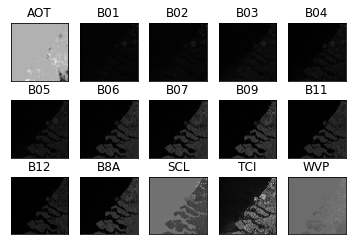

In [3]:
for i, (band, data) in enumerate(r60m.items()):
  ax = plt.subplot2grid((3,5), (i//5, i%5))
  ax.imshow(data.read()[0], cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(band)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


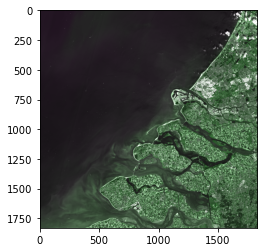

In [4]:
# pseudo rgb
bands = ['B02', 'B03', 'B02']
dataset = r60m


data = [dataset[band] for band in bands if band in dataset]
stack = np.array([img.read()[0].flatten()/2000 for img in data]).T
rgb_arr = np.array(np.split(stack, data[0].width))
  
plt.imshow(rgb_arr)

Label 0: 2596958 occurences
Label 1: 671554 occurences
Label 2: 80388 occurences


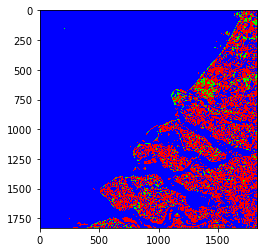

In [13]:
# parameters
bands = ['B02', 'B04']
dataset = r60m
n_labels = 3
seed = 1


data = [dataset[band] for band in bands if band in dataset]
stack = np.array([img.read()[0].flatten() for img in data]).T
kmeans = MiniBatchKMeans(n_clusters=n_labels, random_state=seed).fit(stack)
label_arr = np.array(np.split(kmeans.labels_, data[0].width))

for i in range(n_labels):
  print('Label %s: %s occurences' % (i, np.count_nonzero(kmeans.labels_ == i)))

plt.imshow(label_arr, cmap='brg', interpolation='nearest')

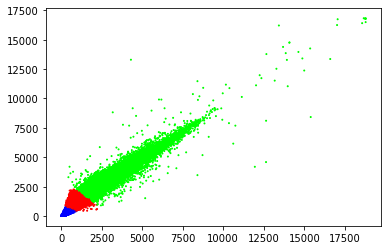

In [14]:
plt.scatter(stack.T[0], stack.T[1], s=1, c=kmeans.labels_, cmap='brg')

In [7]:
data = r60m

matrix = []
for a in data.values():
  row = []
  for b in data.values():
    row.append(
      round(ndigits=2,
            number=stats.pearsonr(a.read()[0].flatten(), 
                                  b.read()[0].flatten())[0]
           )
    )
  matrix.append(row)

pd.DataFrame(matrix, columns=data.keys(), index=data.keys())

,AOT,B01,B02,B03,B04,B05,B06,B07,B09,B11,B12,B8A,SCL,TCI,WVP
AOT,1.00,0.05,0.06,0.05,0.04,0.01,-0.03,-0.04,-0.04,-0.05,-0.02,-0.05,0.10,0.04,0.12
B01,0.05,1.00,0.95,0.88,0.85,0.75,0.47,0.40,0.42,0.57,0.64,0.38,0.05,0.76,-0.12
B02,0.06,0.95,1.00,0.96,0.93,0.82,0.53,0.46,0.47,0.65,0.72,0.44,-0.02,0.85,-0.15
B03,0.05,0.88,0.96,1.00,0.98,0.93,0.71,0.65,0.65,0.80,0.84,0.63,-0.24,0.93,-0.13
B04,0.04,0.85,0.93,0.98,1.00,0.95,0.71,0.64,0.64,0.85,0.90,0.63,-0.27,0.97,-0.19
B05,0.01,0.75,0.82,0.93,0.95,1.00,0.88,0.83,0.83,0.95,0.94,0.82,-0.49,0.94,-0.11
B06,-0.03,0.47,0.53,0.71,0.71,0.88,1.00,0.99,0.99,0.92,0.82,0.99,-0.72,0.72,0.09
B07,-0.04,0.40,0.46,0.65,0.64,0.83,0.99,1.00,0.99,0.89,0.77,1.00,-0.75,0.66,0.13
B09,-0.04,0.42,0.47,0.65,0.64,0.83,0.99,0.99,1.00,0.89,0.77,0.99,-0.73,0.65,0.11
B11,-0.05,0.57,0.65,0.80,0.85,0.95,0.92,0.89,0.89,1.00,0.97,0.89,-0.64,0.87,-0.14


Label 0: 2241468 occurences
Label 1: 338835 occurences
Label 2: 267416 occurences
Label 3: 264004 occurences
Label 4: 216530 occurences
Label 5: 20647 occurences


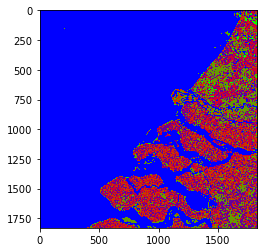

In [12]:
# parameters
bands = r60m.keys()
dataset = r60m
n_labels = 6
seed = 2


data = [dataset[band] for band in bands if band in dataset]
stack = np.array([img.read()[0].flatten() for img in data]).T
kmeans = MiniBatchKMeans(n_clusters=n_labels, random_state=seed).fit(stack)
label_arr = np.array(np.split(kmeans.labels_, data[0].width))

for i in range(n_labels):
  print('Label %s: %s occurences' % (i, np.count_nonzero(kmeans.labels_ == i)))

plt.imshow(label_arr, cmap='brg', interpolation='nearest')

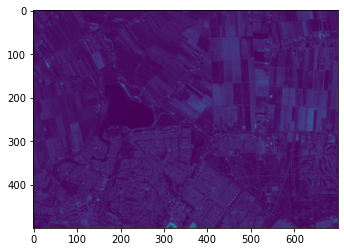

In [9]:
# location of subset
subset = (601200.0, 5773695.0, 700, 500)

def crop(ds, x, y, row, col):
  row_off,col_off = ds.index(x,y)
  window = rasterio.windows.Window(col_off, row_off, row, col)
  return ds.read(window=window)
     
plt.imshow(
  crop(r10m['B04'], *subset)[0])